In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scienceplots
import sympy as smp

plt.style.use(["science", "grid", "notebook"])

### Random variable through a distribution

In [11]:
x = np.linspace(0, 3, 100)
f_x = 2 * np.exp(-2 * x)
F_x = 1 - np.exp(-2 * x)

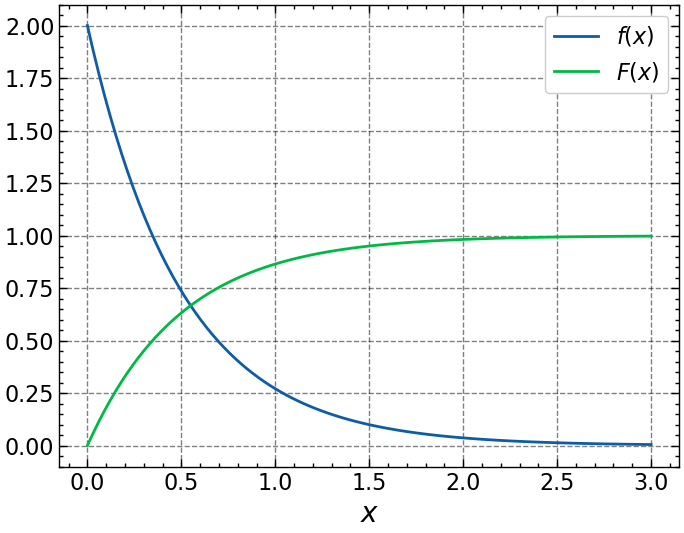

In [12]:
plt.Figure(figsize=(8, 3))
plt.plot(x, f_x, label=r"$f(x)$")
plt.plot(x, F_x, label=r"$F(x)$")
plt.legend()
plt.xlabel("$x$", fontsize=20)
plt.legend()
plt.show()

In [13]:
Us = np.random.rand(1000)
F_inv_Us = -np.log(1 - Us) / 2

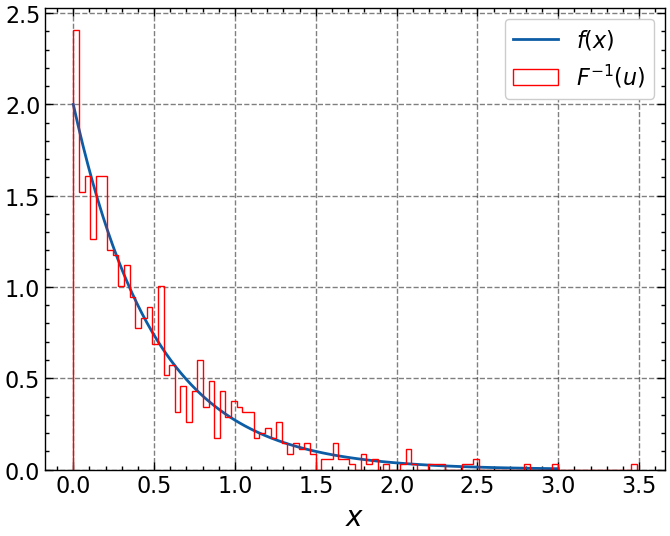

In [ ]:
plt.Figure(figsize=(8, 3))
plt.plot(x, f_x, label=r"$f(x)$")
plt.hist(
    F_inv_Us,
    histtype="step",
    color="red",
    density="norm",  ### normalize
    bins=100,
    label="$F^{-1}(u)$",
)
plt.legend()
plt.xlabel("$x$", fontsize=20)
plt.legend()
plt.show()

### Build my distribution
use a search sort algorithm if there is not a invitible formular

In [15]:
x, y, F1, F2, E1, E2 = smp.symbols("x y F_1 F_2 E_1 E_2", real=True, positive=True)
fs = F1 * smp.exp(-smp.sqrt(x / E1)) + F2 * smp.exp(-smp.sqrt(x / E2))
fs

F_1*exp(-sqrt(x)/sqrt(E_1)) + F_2*exp(-sqrt(x)/sqrt(E_2))

In [19]:
Fs = smp.integrate(fs, (x, 0, y))
Fs

2*E_1*F_1 + 2*E_2*F_2 + F_1*(-2*sqrt(E_1)*sqrt(y)*exp(-sqrt(y)/sqrt(E_1)) - 2*E_1*exp(-sqrt(y)/sqrt(E_1))) + F_2*(-2*sqrt(E_2)*sqrt(y)*exp(-sqrt(y)/sqrt(E_2)) - 2*E_2*exp(-sqrt(y)/sqrt(E_2)))

In [20]:
Fn = smp.lambdify((y, E1, E2, F1, F2), Fs)
fn = smp.lambdify((x, E1, E2, F1, F2), fs)

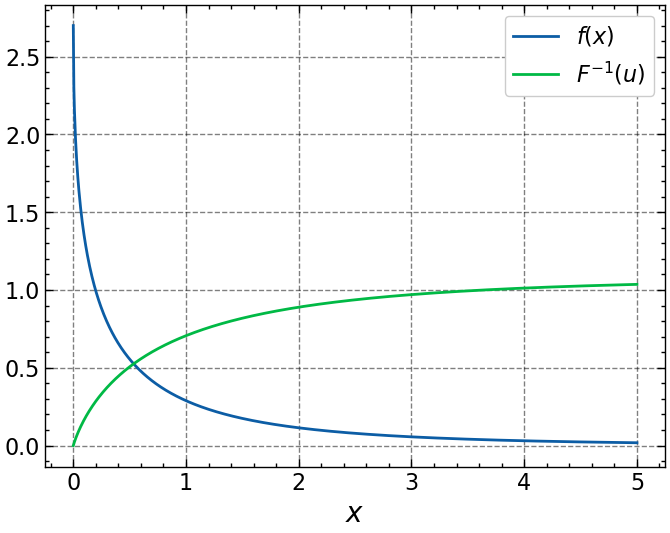

In [25]:
E1 = E2 = 0.2
F1 = 1.3
F2 = 1.4
x = np.linspace(0, 5, 1000)
plt.Figure(figsize=(8, 3))
plt.plot(x, fn(x, E1, E2, F1, F2), label=r"$f(x)$")
plt.plot(x, Fn(x, E1, E2, F1, F2), label=r"$F^{-1}(u)$")
plt.legend()
plt.xlabel("$x$", fontsize=20)
plt.legend()
plt.show()

In [32]:
F_inv_Us = x[np.searchsorted(Fn(x, E1, E2, F1, F2)[:-1], Us)]

or use 
```python
    x = np.linspace(0,2,100)
    f = x**2
    f_inv = np.interp(x,f,x)
```
to get a inverse

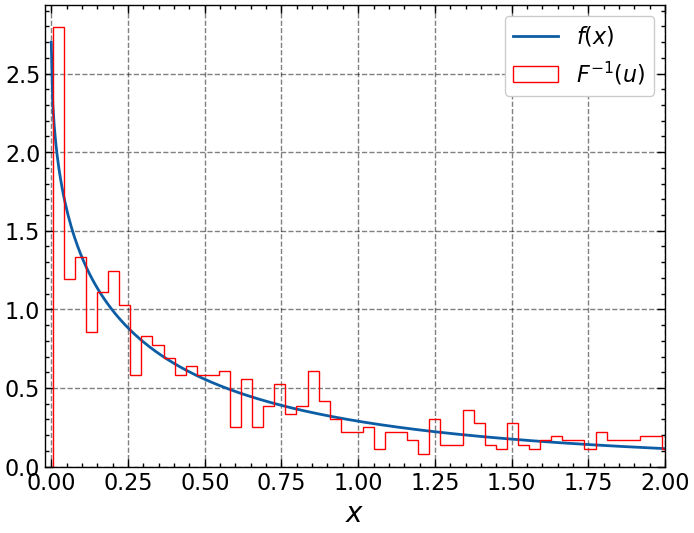

In [ ]:
plt.Figure(figsize=(8, 3))
plt.plot(x, fn(x, E1, E2, F1, F2), label=r"$f(x)$")
plt.hist(
    F_inv_Us,
    histtype="step",
    color="red",
    density="norm",  ### normalize
    bins=100,
    label="$F^{-1}(u)$",
)
plt.legend()
plt.xlabel("$x$", fontsize=20)
plt.legend()
plt.xlim(-0.02, 2)
plt.show()

### Built in Random Variables

In [10]:
np.random?

Type:        module
String form: <module 'numpy.random' from 'd:\\My_Widgets\\Miniconda\\envs\\py312\\Lib\\site-packages\\numpy\\random\\__init__.py'>
File:        d:\my_widgets\miniconda\envs\py312\lib\site-packages\numpy\random\__init__.py
Docstring:  
Random Number Generation

Use ``default_rng()`` to create a `Generator` and call its methods.

=============== =========================================================
Generator
--------------- ---------------------------------------------------------
Generator       Class implementing all of the random number distributions
default_rng     Default constructor for ``Generator``
=============== =========================================================

============================================= ===
BitGenerator Streams that work with Generator
--------------------------------------------- ---
MT19937
PCG64
PCG64DXSM
Philox
SFC64
============================================= ===

============================================= ===
Getti

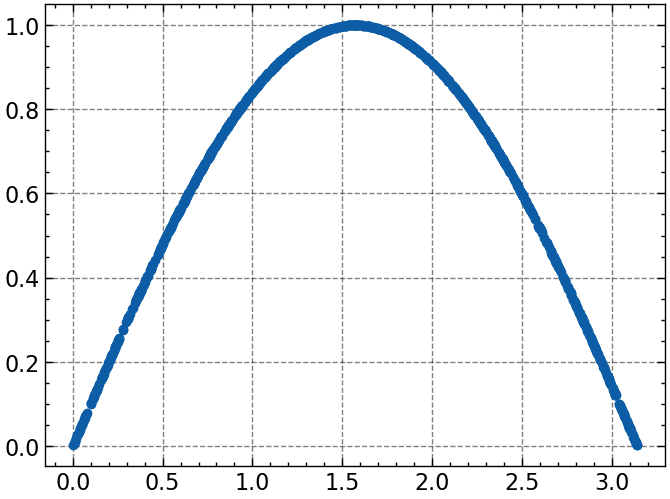

In [26]:
x = np.random.uniform(0, np.pi, 1000)
y = np.sin(x)
plt.Figure(figsize=(8, 3))
plt.scatter(x, y, label=r"$f(x)$")
plt.show()

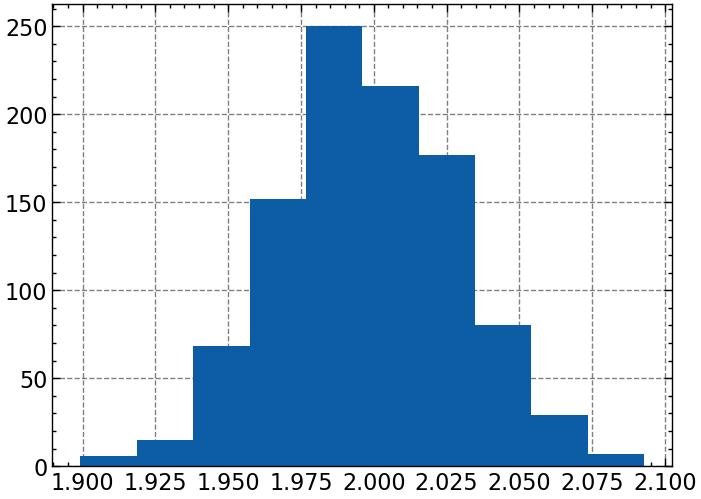

In [36]:
answers = [np.sin(np.random.uniform(0, np.pi, 1000)) for _ in range(1000)]
plt.Figure(figsize=(8, 3))
plt.hist([np.pi * sum(y) / 1000 for y in answers], label=r"$f(x)$")
plt.xticks()
plt.show()

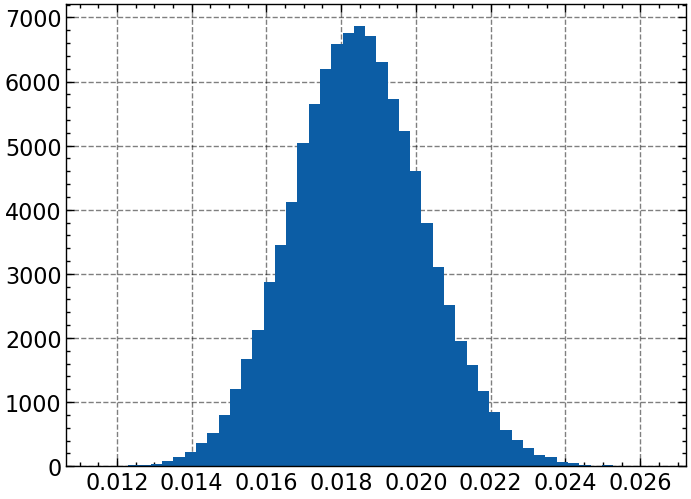

In [4]:
answers = []
for _ in range(100000):
    x = np.random.uniform(0, np.pi, 1000)
    y = np.sin(5 * x) ** 3 * np.exp(-10 * x)
    answers.append(np.pi * sum(y) / 1000)
plt.Figure(figsize=(8, 3))
plt.hist(answers, bins=50, label=r"$f(x)$")
plt.xticks()
plt.show()

In [ ]:
from statistics import mode

mode(answers)

np.float64(0.018641145983307534)

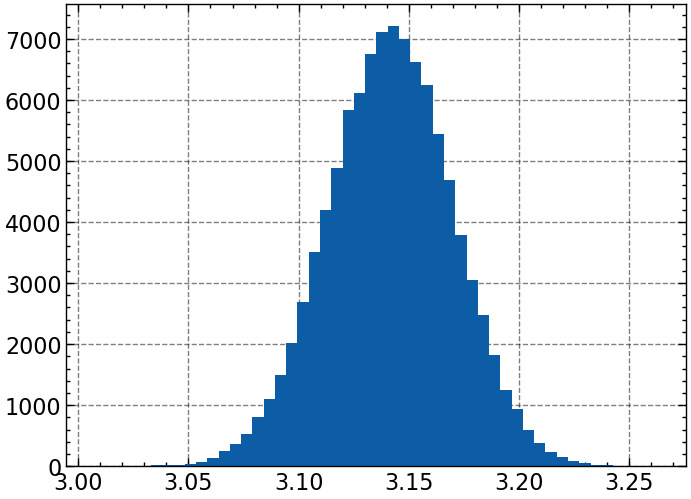

In [25]:
answers = []
for _ in range(100000):
    x = np.random.uniform(0, 1, 1000)
    y = np.sqrt(1 - x**2)
    answers.append(4 * sum(y) / 1000)
plt.Figure(figsize=(8, 3))
plt.hist(answers, bins=50, label=r"$f(x)$")
plt.xticks()
plt.show()

In [26]:
from statistics import mode, mean

mean(answers) - 1 / np.sqrt(100000), mean(answers) + 1 / np.sqrt(100000)

(np.float64(3.1384431326511746), np.float64(3.144767687971511))

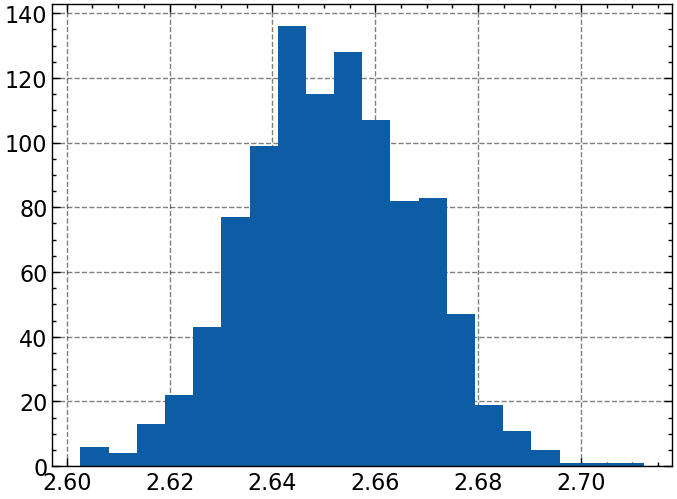

In [41]:
answers = []
for _ in range(1000):
    x = np.random.uniform(1, 10, 1000)
    y = np.log(x) / x
    answers.append(9 * sum(y) / 1000)
plt.Figure(figsize=(8, 3))
plt.hist(answers, bins=20, label=r"$f(x)$")
plt.xticks()
plt.show()

In [42]:
from statistics import mode, mean

mean(answers) - 1 / np.sqrt(1000000), mean(answers) + 1 / np.sqrt(100000)

(np.float64(2.6505292676504424), np.float64(2.6546915453106106))